---
title: Prediction of Alzheimer's disease
jupyter: python3
---

### Pre-requisites

You may need to install some libraries to run this practical. If you are using Anaconda the recommended way to install it is with

```{.bash}
conda install openpyxl
```

Alternatively, you can use `pip` as in 

```{.bash}
python -m pip install -U pip
python -m pip install -U openpyxl
```

# Goal
Use the [Bader *et al.* 2020](https://www.embopress.org/doi/full/10.15252/msb.20199356) dataset to train a machine learning model which can test whether NPTX2 (identified as AD biomarker in [Shen *et al.* 2024](https://doi.org/10.1016/j.cell.2024.08.049)) can be used to predict whether a patient has AD using CSF samples.


# Background

Alzheimer's disease (AD) is a neurodegenerative disorder affecting millions of people worldwide. Approximately 1% of AD cases are classified as autosomal dominant Alzheimer’s disease (ADAD), meaning they are caused by mutations to the genes *PSEN1*, *PSEN2*, or *APP*. Almost all people with these mutations will go on to develop AD, typically with a younger onset than those with sporadic Alzheimer's disease (sAD). With the genetic cause of ADAD generally understood but many causes of sAD unclear, studying the molecular basis of ADAD disease progression can inform how sAD may develop.
 
Proteomics is an approach which involves looking at the entire complement of proteins expressed within a cell, tissue, or organism. Proteomics experiments can generate powerful molecular insights, such as by showing which proteins are up- or downregulated in different diseases. These experiments often generate very large datasets, which can be overwhelming to analyse. However, data science approaches such as machine learning can greatly enhance our ability to extract useful information from these datasets.
 
A recent paper showcases how machine learning can be applied to proteomics datasets <https://doi.org/10.1016/j.cell.2024.08.049>.
 
Using a cerebrospinal fluid (CSF) proteomics database taken from mutation carriers or non-carriers for ADAD, the authors sought to find biomarkers for the disease. The authors identify six proteins which can be used to predict with high accuracy whether a patient is a mutation carrier or a non-carrier for ADAD. One of these proteins is NPTX2.
 
The study also reveals that many ADAD-associated proteins are associated with sAD as well, which could represent a large step forwards in diagnosis of sAD (the more common form of AD).

**Your task is to test whether this proposed biomarker for ADAD can also predict whether a patient has developed sAD.**


# Questions

Patient X, aged 70, has visited their doctor with cognitive symptoms. After taking a CSF sample and performing mass spectrometry, the abundance of NPTX2 was detected as 321700.
 
1. Using the data from a publicly available database of CSF samples taken from healthy or AD patients, create an appropriate ML model to predict whether Patient X has Alzheimer's Disease. Comment on why you chose this model and how reliable it is.
 
2. Patient X does have AD. Did your model predict this? If not, why might this be?
 
# Dataset
 
The complete data can be found in the supplementary files below:

- [Proteomics data](https://www.embopress.org/doi/suppl/10.15252/msb.20199356/suppl_file/msb199356-sup-0003-datasetev1.xlsx)
- [Patient data](https://www.embopress.org/doi/suppl/10.15252/msb.20199356/suppl_file/msb199356-sup-0004-datasetev2.xlsx)

This data requires pre-processing. You may like to do this yourself as an exercise in tidying data, or you can use the processed form [EMBO_Bader_2020_AD_proteomics_NPTX2_tidy.xlsx](./data/EMBO_Bader_2020_AD_proteomics_NPTX2_tidy.xlsx>).



::: {#ex1 .callout-note icon=true title='Pre-processing of the data' collapse="true"}
This was challenging for three main complexities intrinsic to the original Excel spreadsheets found in the paper:

1. The 1st spreadsheet in the supplementary info of the paper had all the protein abundances from the ~200 patients. However, there was no other information in this spreadsheet about the patients (not even disease status). Information about the patients was in a 2nd spreadsheet. 
This second spreadsheet contained all the information including age, disease status, collection site, and gender. However, some patients had been deleted so that this 2nd spreadsheet had fewer patients, requiring the patients to be matched using the 'sample name' column.
    
2. Missing values - a couple of the patients had missing values for NPTX2 (written as 'filtered'). For simplicity in this demonstration, I deleted these entries. However, this can introduce artifacts - see this course for more information on how to handle missing values:
    
3. In the 1st spreadsheet (proteomics dataset), 1000s proteins were all listed, with each protein in a separate row and each patient (with codified 'sample name') in a separate column. To tidy the data, I made a column for each variable, or feature (AD status, NPTX2 abundance, age, gender), with each patient, or observation, in a row.
:::


# Worked example of analysis

See below for a worked example, with additional exercises and questions to consider.


## Importing pandas and reading Excel file

In [1]:
import pandas as pd

NPTX2_tidy = pd.read_excel("extra/data/EMBO_Bader_2020_AD_proteomics_NPTX2_tidy.xlsx")
NPTX2_tidy.head()

,Patient,Age,Gender,Collection site,AD status,NPTX2 abundance,sample name
0,Patient 1,71,f,Sweden,control,226437.734375,20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM...
1,Patient 2,77,m,Sweden,AD,123887.046875,20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM...
2,Patient 3,75,m,Sweden,AD,391305.937500,20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM...
3,Patient 4,72,f,Sweden,AD,296838.531250,20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM...
4,Patient 5,63,f,Sweden,AD,211497.703125,20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM...


## Importing seaborn and visualising data

In [2]:
import seaborn as sns

To compare NPTX2 abundance in control vs AD groups open the data in Jupyter Notebooks. Use a suitable plot to visualise the distribution of NPTX2 abundance between the control and AD patients. What do you notice and what does this indicate about the suitability of this protein as a biomarker?

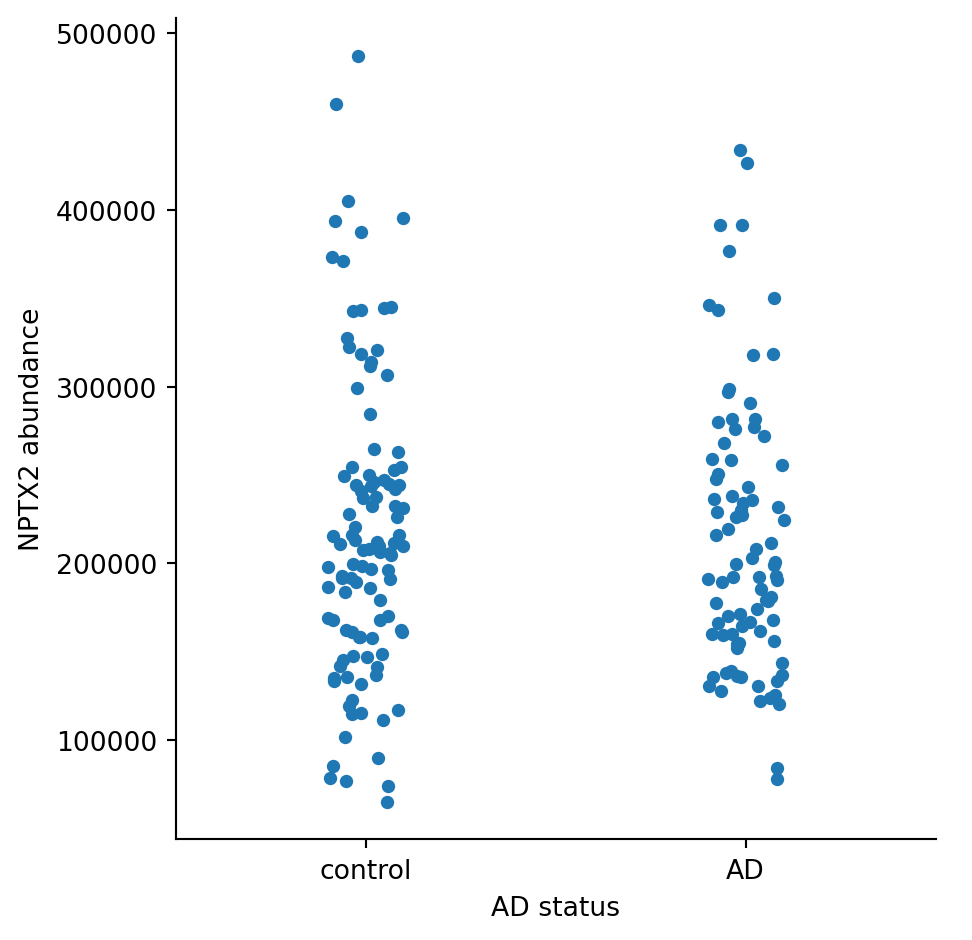

In [3]:
sns.catplot(data=NPTX2_tidy, x="AD status", y="NPTX2 abundance")

From this initial glance, it is apparent that the two groups have similar distributions of NPTX2 abundance, which indicates that this may not be a good biomarker for AD status in this dataset, as we would expect AD patients to have higher levels of NPTX2. 

## Further data analysis

**How are the different variables distributed (e.g. AD status, age, within different collection sites)?**

In [4]:
NPTX2_tidy.dtypes #Checking data types. Object = categorical

x=NPTX2_tidy["AD status"]
y=NPTX2_tidy["NPTX2 abundance"]

NPTX2_tidy.value_counts(x) 

AD status
control    108
AD          87
Name: count, dtype: int64

This reveals that there are more AD than control patients. **Is this important?**

In [5]:
NPTX2_tidy.groupby(by=["AD status"]).mean(numeric_only =True) #Grouping by AD status to see how all numerical conditions vary across AD vs control

,Age,NPTX2 abundance
AD status,,
AD,71.885057,214289.209052
control,64.407407,217592.649342


Looking at the mean ages and NPTX2 abundances shows that the NPTX2 is very similar between the 2 groups (as mentioned earlier). Also, there is difference in age between the two groups. **How might this affect our interpretation of the data?**

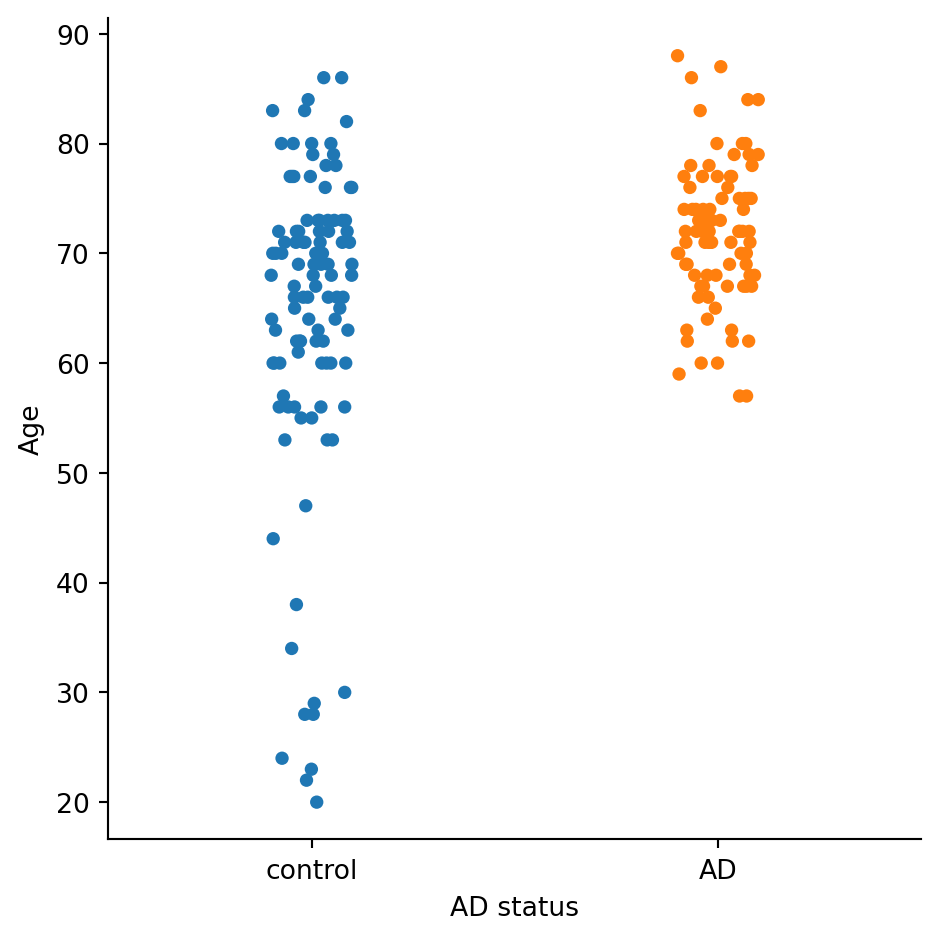

In [6]:
sns.catplot(data=NPTX2_tidy, x="AD status", y="Age", hue="AD status")

This scatterplot also shows that the control group has a population of younger patients not present in the AD group. Let's see if that population clusters with another variable (e.g. collection site)

Collection site,Berlin,Kiel,Magdeburg,Sweden
AD status,,,,
AD,32,0,26,29
control,50,16,12,30


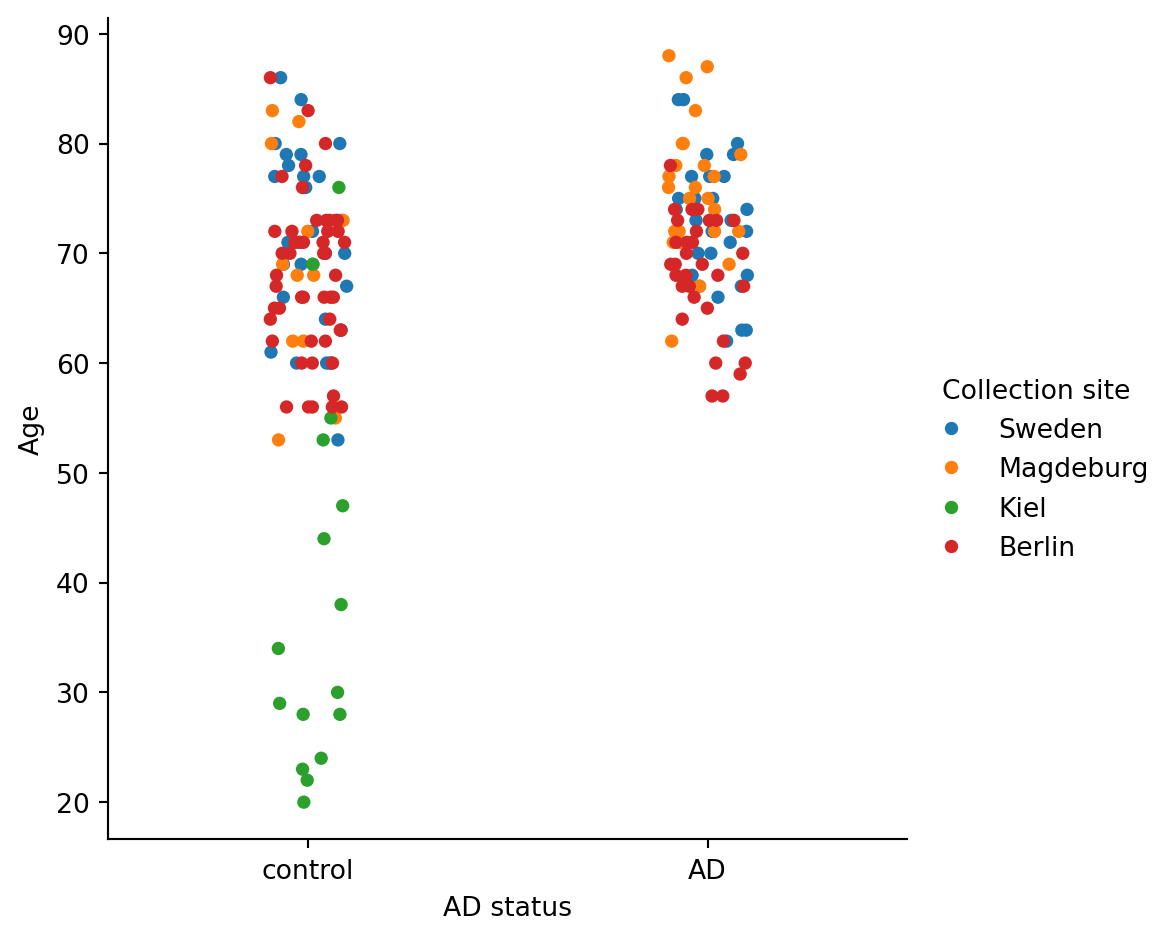

In [7]:
pd.crosstab(index=NPTX2_tidy["AD status"], columns=NPTX2_tidy["Gender"]) #The cross-tabulation allows you to look at the frequency distribution of multiple categorical variables, and see how they are related to one another

sns.catplot(data=NPTX2_tidy, x="AD status", y="Age", hue="Collection site")

pd.crosstab(index=NPTX2_tidy["AD status"], columns=NPTX2_tidy["Collection site"])

This shows that all of the patients from the Kiel subset are control -- there are no AD patients -- and this cohort is disproportionately younger than the other chorts. **How might this affect the dataset, or the way that we analyse it?**

**As an extension task, after you fit your model the first time, try it without the Kiel dataset. Does this affect your result?**

In [8]:
df = pd.DataFrame(NPTX2_tidy)
df.head()

,Patient,Age,Gender,Collection site,AD status,NPTX2 abundance,sample name
0,Patient 1,71,f,Sweden,control,226437.734375,20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM...
1,Patient 2,77,m,Sweden,AD,123887.046875,20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM...
2,Patient 3,75,m,Sweden,AD,391305.937500,20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM...
3,Patient 4,72,f,Sweden,AD,296838.531250,20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM...
4,Patient 5,63,f,Sweden,AD,211497.703125,20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM...


## Classification

Here we will use k-nearest neighbours for predicting categories of data (AD or healthy). To use it, we need to encode our data into a binary form which the algorithms can process:

In [9]:
df_encoded = pd.get_dummies(df["AD status"])
df_encoded .head()

,AD,control
0,False,True
1,True,False
2,True,False
3,True,False
4,True,False


Now concatenating the two data frames:

In [10]:
binary = pd.concat([df_encoded, df], axis=1)
binary.head()

,AD,control,Patient,Age,Gender,Collection site,AD status,NPTX2 abundance,sample name
0,False,True,Patient 1,71,f,Sweden,control,226437.734375,20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM...
1,True,False,Patient 2,77,m,Sweden,AD,123887.046875,20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM...
2,True,False,Patient 3,75,m,Sweden,AD,391305.937500,20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM...
3,True,False,Patient 4,72,f,Sweden,AD,296838.531250,20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM...
4,True,False,Patient 5,63,f,Sweden,AD,211497.703125,20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM...


Visualising the data, plotting age against NPTX2 abundance

,n_neighbors,10
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


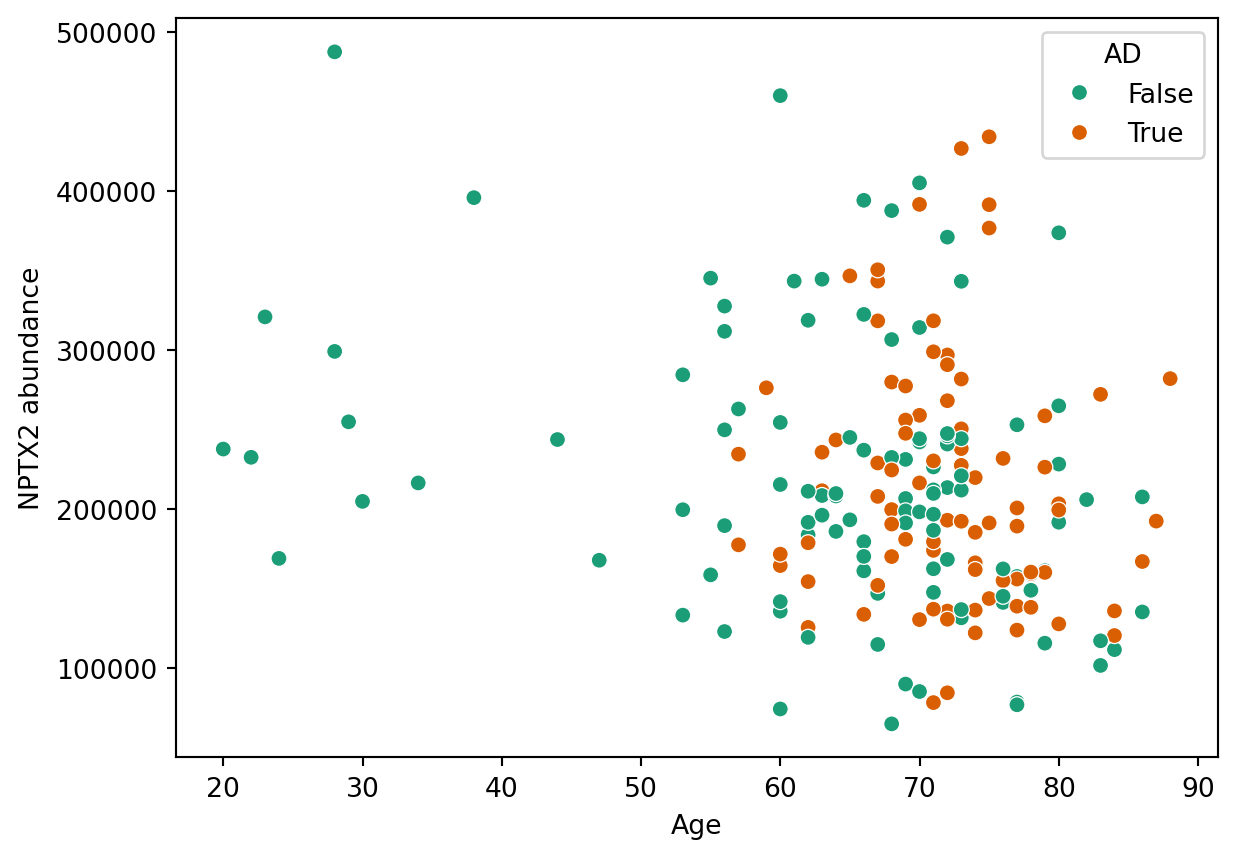

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

sns.scatterplot(data=binary, x="Age", y="NPTX2 abundance", hue="AD", palette="Dark2")

X = binary[["Age", "NPTX2 abundance"]]
y = binary["AD"]

train_X, test_X, train_y, test_y = train_test_split(X, y)

model = KNeighborsClassifier(n_neighbors=10)
model.fit(train_X, train_y)

I am asking the question "Is patient y 0 or 1 (negative or positive) for AD?"

In [12]:
pred = pd.DataFrame({"Age": [70], "NPTX2 abundance":[297500]})  # Make a new DataFrame containing the X values
pred["AD"] = model.predict(pred)  # Make a prediction and add that data into the table
pred

,Age,NPTX2 abundance,AD
0,70,297500,True


**Now test the reliability of your model. What is your model score? Would you use this model on real patients? Comment on the quality of the data you used in this exercise.**

Now testing the model:

In [13]:
model.score(test_X, test_y)

0.5306122448979592